In [1]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image, display

In [2]:
run_id = "98e80c8f-3e2745af"


In [3]:
def animate_singular_values(minibatch_idx, save_path='singular_values.gif', interval=200, bins=30):
    df = pd.read_csv(f"logs/{run_id}/singular_values_at_step{minibatch_idx}.csv")
    df['singular_values'] = df['singular_values'].apply(ast.literal_eval)

    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Unpack lists and find global min/max
    all_values = np.concatenate(df['singular_values'].values)
    value_range = (float(np.min(all_values)), float(np.max(all_values)))
    
    def update(i):
        ax.clear()
        current_data = np.concatenate(df[df['newton_schulz_iter'] == i]['singular_values'].values)
        
        ax.hist(current_data, bins=bins, 
               range=value_range,
               alpha=0.7, color='blue')
            
        ax.set(xlabel='Singular Values', 
               ylabel='Frequency',
               title=f'Singular Values at Minibatch {minibatch_idx}, Newton-Schulz Iteration {i}')
        ax.grid(alpha=0.3)
    
    anim = FuncAnimation(
        fig, 
        update,
        frames=int(df['newton_schulz_iter'].max()) + 1,
        interval=interval
    )
    
    # Save as GIF
    writer = PillowWriter(fps=1000/interval)  # Convert interval to fps
    anim.save(f"{run_id}_{minibatch_idx}_singular_values.gif", writer=writer)
    plt.close()
    
    return anim

# Usage:
# animate_singular_values(df0, save_path='my_animation.gif', interval=500)

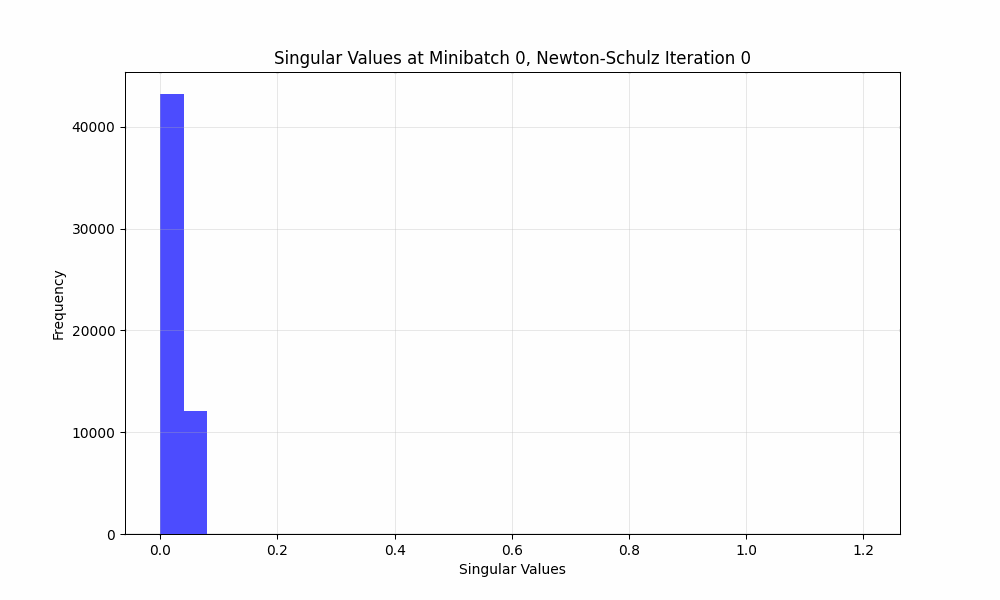

In [4]:
animate_singular_values(minibatch_idx=0)
display(Image(f"{run_id}_0_singular_values.gif"))


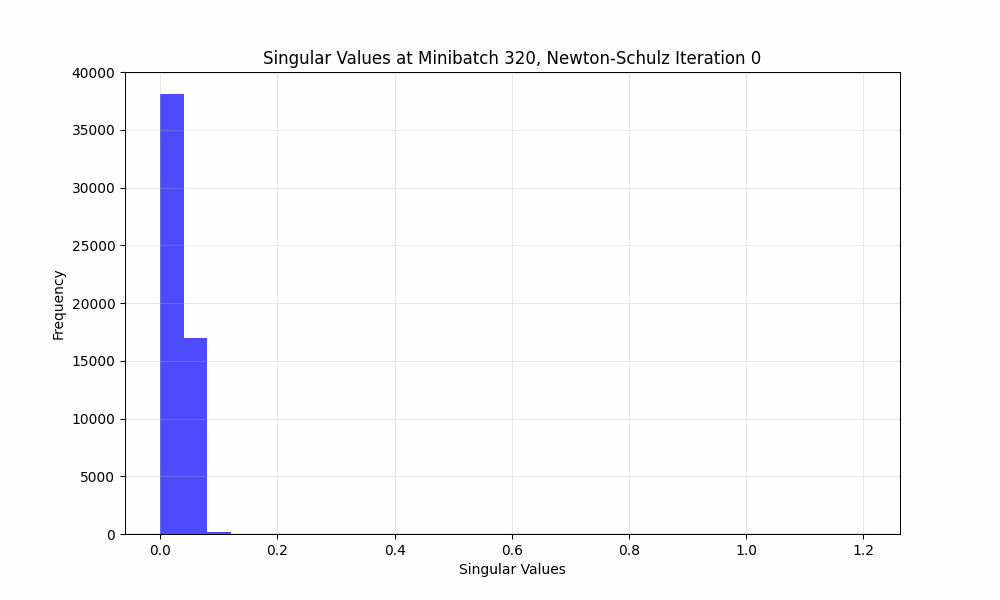

In [7]:
animate_singular_values(minibatch_idx=320)
display(Image(f"{run_id}_320_singular_values.gif"))

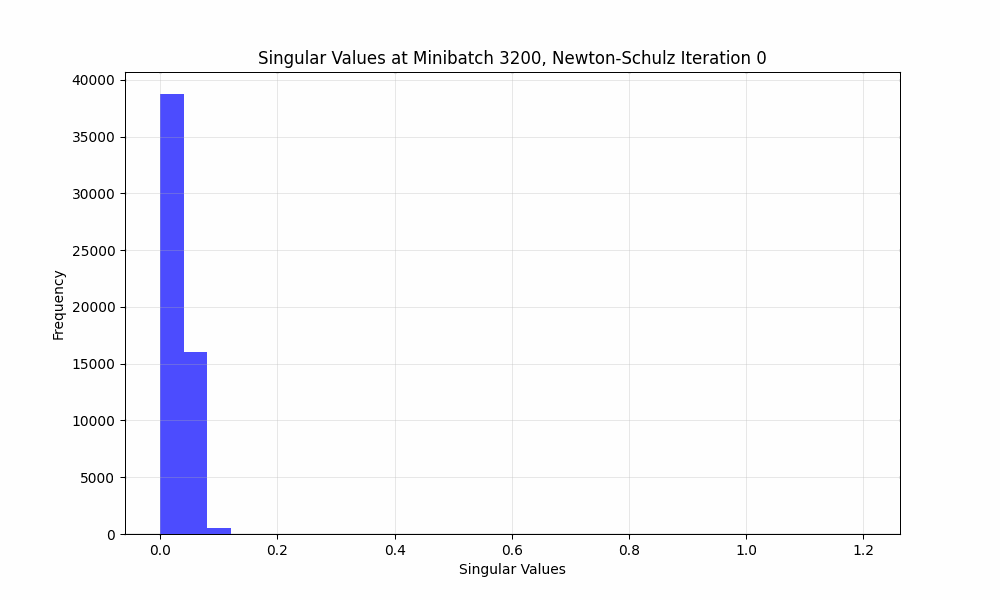

In [6]:
animate_singular_values(minibatch_idx=3200)
display(Image(f"{run_id}_3200_singular_values.gif"))

In [22]:
df = pd.read_csv(f"logs/{run_id}/singular_values_at_step0.csv")
df['singular_values'] = df['singular_values'].apply(ast.literal_eval)
singular_values_at_step9 = df.loc[df['newton_schulz_iter'] == 0]['singular_values'].tolist()[0]
len([x for x in singular_values_at_step9 if x == 0.0])


18432

In [20]:
len([x for x in singular_values_at_step9 if x == 0.00001])

18432

In [21]:
len([x for x in singular_values_at_step9 if x < 1e-10])

18432